### **Customer Lifetime Value (CLV)**

[Sumber data CLV](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) adalah ukuran untuk mengetahui seberapa bernilainya seorang pelanggan bagi sebuah perusahaan. Dengan memahami CLV, perusahaan dapat menentukan besaran keuntungan yang diperoleh dari satu pelanggan serta biaya yang diperlukan untuk mendapatkan atau mempertahankan pelanggan baru. CLV memainkan peran penting dalam strategi pemasaran, karena membantu perusahaan menargetkan pelanggan yang memiliki nilai tinggi secara lebih efektif dan memahami perubahan pola pelanggan di masa depan.

Dalam konteks ini, CLV dapat dipengaruhi oleh berbagai fitur, seperti kelas kendaraan (Vehicle Class), cakupan asuransi (Coverage), tipe penawaran pembaruan (Renew Offer Type), dan lain-lain. Analisis terhadap data ini memungkinkan perusahaan mengidentifikasi pelanggan yang paling bernilai dan merancang strategi pemasaran yang sesuai untuk mempertahankan mereka.

**Problem Statement**

Salah satu tantangan utama perusahaan adalah mengoptimalkan retensi pelanggan dan meningkatkan profitabilitas dengan pendekatan berbasis data. CLV memberikan wawasan tentang pelanggan yang memiliki dampak signifikan terhadap pendapatan perusahaan, tetapi banyak perusahaan menghadapi kesulitan dalam menghitung nilai ini secara akurat karena faktor yang memengaruhi CLV bersifat dinamis dan kompleks.

Selain itu, perusahaan sering kali tidak memiliki alat atau model yang dapat membantu mereka memprediksi CLV untuk pelanggan baru. Tanpa pemahaman yang jelas tentang CLV, strategi pemasaran cenderung kurang efektif, sehingga perusahaan tidak dapat memaksimalkan potensi keuntungan dari setiap pelanggan.

**Goals**

Tujuan utama dari analisis ini adalah membangun model prediktif yang dapat menghitung CLV dengan akurat untuk setiap pelanggan, baik pelanggan yang sudah ada maupun pelanggan baru (nantinya). Dengan memanfaatkan data terkait fitur pelanggan.

Perusahaan dapat memberikan perhatian khusus pada pelanggan bernilai tinggi serta merancang strategi pemasaran yang lebih personal dan tepat sasaran. Hal ini tidak hanya meningkatkan retensi pelanggan tetapi juga mendorong pertumbuhan pendapatan perusahaan secara berkelanjutan.

**Analytic Approach**

Langkah pertama adalah menganalisis data pelanggan untuk menemukan pola dan hubungan antara berbagai fitur yang ada dengan CLV. Setelah itu, model prediksi berbasis regresi akan dibangun untuk memprediksi CLV. Model ini dirancang untuk dapat menangkap pengaruh setiap fitur pelanggan terhadap nilai CLV mereka, sehingga memberikan prediksi yang realistis dan dapat diandalkan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

- Dataset merupakan data CLV.
- Setiap baris data merepresentasikan informasi terkait customer.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Kategori kelas kendaraan |
| Coverage | Object | Jenis cakupan asuransi (Basic, Extended, Premium) |
| Renew Offer Type | Object | Tipe penawaran pembaruan polis (misalnya: Offer1, Offer2, dll.) |
| Employment Status | Object | Status pekerjaan pelanggan (Employed, Unemployed, Retired, dll.) |
| Marital Status | Object | Status pernikahan pelanggan (Single, Married, Divorced) |
| Education | Object | Tingkat pendidikan pelanggan (High School, Bachelor, Master, dll.) |
| Number of Policies | Float | Jumlah polis yang dimiliki pelanggan |
| Monthly Premium Auto | Float | Premi bulanan untuk asuransi kendaraan |
| Total Claim Amount | Float | Total jumlah klaim yang diajukan oleh pelanggan |
| Income | Float | Pendapatan tahunan pelanggan |
| Customer Lifetime Value | Float | Nilai seumur hidup pelanggan bagi perusahaan |


<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import scipy.stats as stats
from scipy.stats import uniform, loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler, MinMaxScaler, FunctionTransformer, PolynomialFeatures
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error,make_scorer
from skopt import BayesSearchCV
import xgboost as xgb
import lightgbm as lgb
import optuna
import pickle
import cloudpickle

In [2]:
df = pd.read_csv("data_customer_lifetime_value.csv")
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


#### **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [5]:
df.duplicated().sum()

618

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
len(df)

5051

Selanjutnya, akan dieksplorasi data berdasarkan jenis, yaitu kategorikal/ordinal dan data numerik.

Pertama, untuk data yang bertipe numerik

In [8]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Melihat distribusi untuk setiap kolom

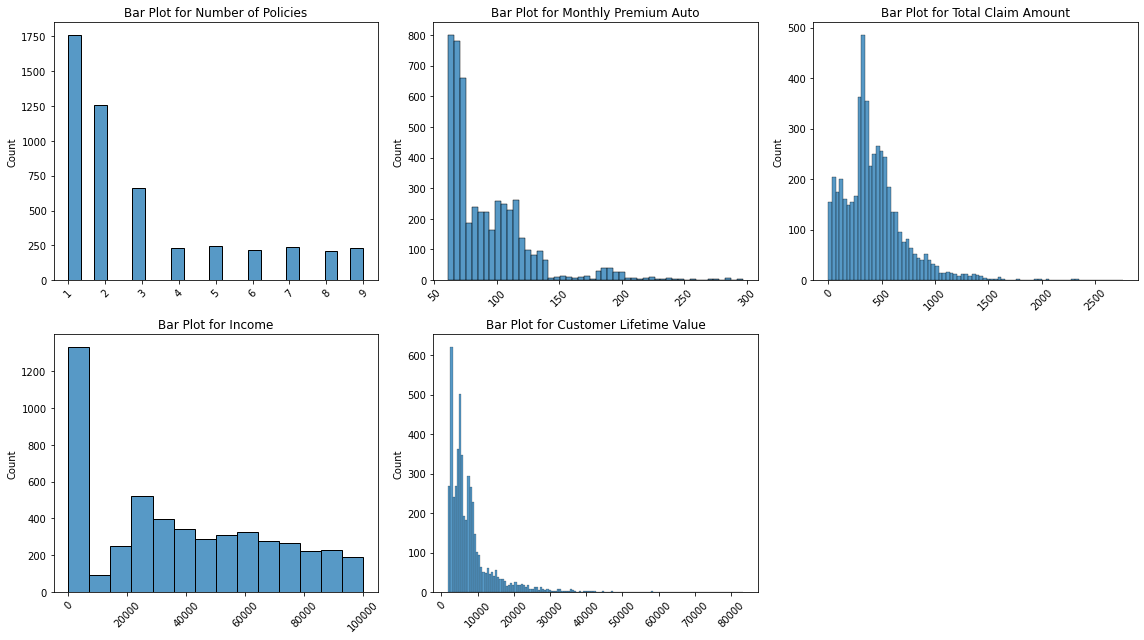

In [9]:
numerical_columns = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

fig, axes = plt.subplots(2,3, figsize=(16,9))

axes = axes.ravel()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Bar Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

Untuk kolom 'Number of Policies' bisa dikategorikan sebagai data kategorikal. Kemudian, pada kolom 'Income, terlihat bahwa terdapat banyak data yang memiliki income = 0. Hal ini tentunya butuh analisis lebih lanjut apakah ada kaitan dengan kolom 'EmploymentStatus' atau tidak. Kemudian, untuk ketiga kolom lainnya ('Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value') memiliki bentuk distribusi yang sangat skew ke kanan sehingga diperlukan treatment tambahan untuk prediksi nantinya.

<Axes: xlabel='Monthly Premium Auto', ylabel='Count'>

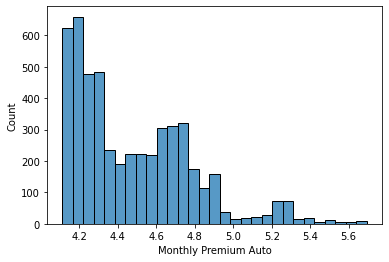

In [10]:
sns.histplot(np.log(df['Monthly Premium Auto']))

<Axes: xlabel='Monthly Premium Auto', ylabel='Count'>

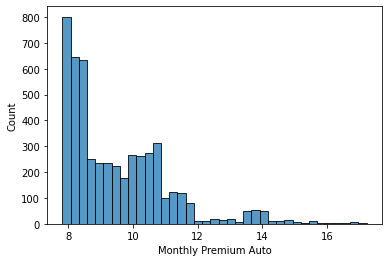

In [11]:
sns.histplot(np.sqrt(df['Monthly Premium Auto']))

Untuk kolom 'Monthly Premium Auto' setelah dilakukan transformasi log dan sqrt data tetap terlihat skew, sehingga untuk kolom ini kita tetap menggunakan data ini untuk prediksi awal.

<Axes: xlabel='Total Claim Amount', ylabel='Count'>

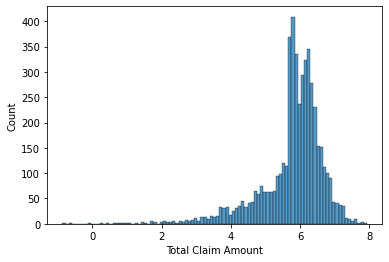

In [12]:
sns.histplot(np.log(df['Total Claim Amount']))

<Axes: xlabel='Total Claim Amount', ylabel='Count'>

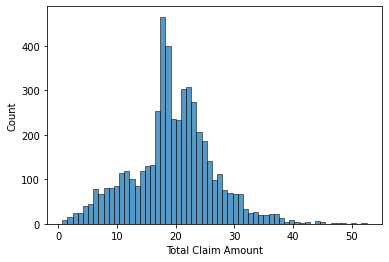

In [13]:
sns.histplot(np.sqrt(df['Total Claim Amount']))

<Axes: xlabel='Total Claim Amount', ylabel='Count'>

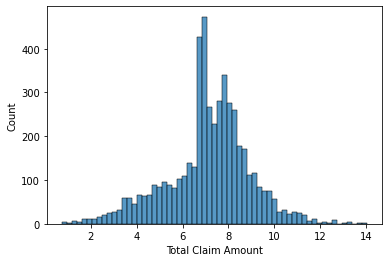

In [14]:
sns.histplot((df['Total Claim Amount'])**(1/3))

In [15]:
stat, p_value = stats.normaltest((df['Total Claim Amount'])**(1/2))
print("p-value:", p_value)

alpha= 0.05
if p_value > alpha:
    print("Data tampaknya mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (tolak H0)")


p-value: 6.794377093241107e-20
Data tidak mengikuti distribusi normal (tolak H0)


In [16]:
stat, p_value = stats.normaltest((df['Total Claim Amount'])**(1/3))
print("p-value:", p_value)

alpha= 0.05
if p_value > alpha:
    print("Data tampaknya mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (tolak H0)")


p-value: 5.223552540558298e-37
Data tidak mengikuti distribusi normal (tolak H0)


Untuk kolom 'Total Claim Amount', setelah dilakukan transformasi sqrt atau (x^(1/3)) tampaknya distribusi cenderung lebih mendekati ke distribusi normal, walaupun setelah diuji, belum mempunyai bukti yang kuat bahwa data mengikuti distribusi yang normal. Oleh karena itu, pada prediksi model, untuk kolom ini, akan tetap menggunakan transformasi sqrt atau (x^(1/3)).

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

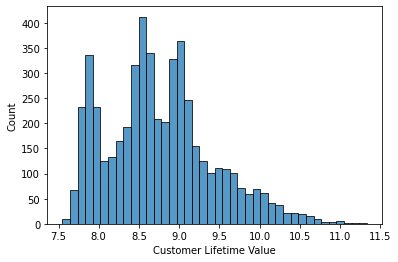

In [17]:
sns.histplot(np.log(df['Customer Lifetime Value']))

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

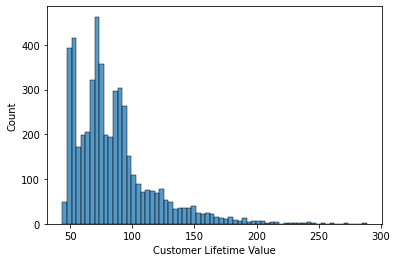

In [18]:
sns.histplot(np.sqrt(df['Customer Lifetime Value']))

In [19]:
stat, p_value = stats.normaltest(np.log(df['Customer Lifetime Value']))
print("p-value:", p_value)

alpha= 0.05
if p_value > alpha:
    print("Data tampaknya mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (tolak H0)")


p-value: 2.253869359928932e-52
Data tidak mengikuti distribusi normal (tolak H0)


In [20]:
stat, p_value = stats.normaltest(np.sqrt(df['Customer Lifetime Value']))
print("p-value:", p_value)

alpha= 0.05
if p_value > alpha:
    print("Data tampaknya mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (tolak H0)")


p-value: 0.0
Data tidak mengikuti distribusi normal (tolak H0)


Untuk kolom 'Customer Lifetime Value' yang juga merupakan target dari model regresi. Untuk kolom ini, kita akan mencoba untuk menggunakan transformasi log pada data target dan nantinya akan kembali mengembalikan nilainya (invers) setelah prediksi dilakukan.

Kemudian, kita akan melihat hubungan antara kolom fitur numerik dengan target

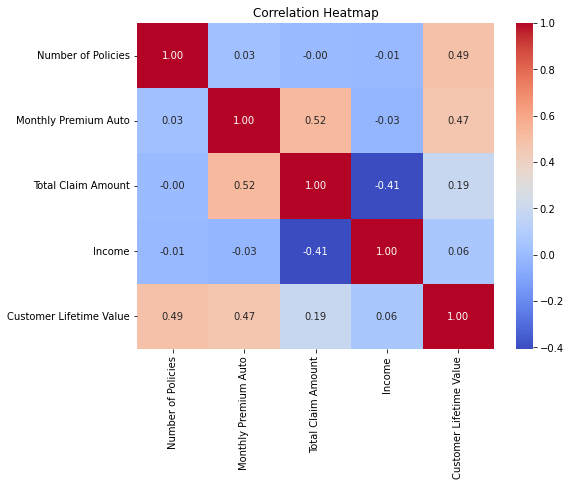

In [21]:
corr_matrix = df[numerical_columns].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Dari hasil analisis, korelasi antara target (CLV) dan fitur Number of Policies menunjukkan hubungan positif dengan tingkat korelasi medium (0.49). Hal ini mengindikasikan bahwa semakin tinggi jumlah number of policies yang dimiliki pelanggan, kemungkinan besar nilai CLV mereka juga akan semakin tinggi. Korelasi ini sejalan dengan asumsi bahwa pelanggan dengan jumlah number of policies yang lebih banyak cenderung memiliki tingkat kepercayaan yang lebih tinggi terhadap perusahaan. Oleh karena itu, fitur ini dapat menjadi indikator yang relevan dalam memprediksi nilai CLV setiap pelanggan.

Fitur Monthly Premium Auto menunjukkan korelasi positif dengan tingkat korelasi medium (0.47) terhadap target (CLV). Oleh karena itu, fitur ini juga dapat digunakan sebagai salah satu variabel dalam memprediksi nilai CLV. Sedangkan untuk fitur sisanya, kita tetap akan memnggunakan fitur tersebut untuk prediksi awal.

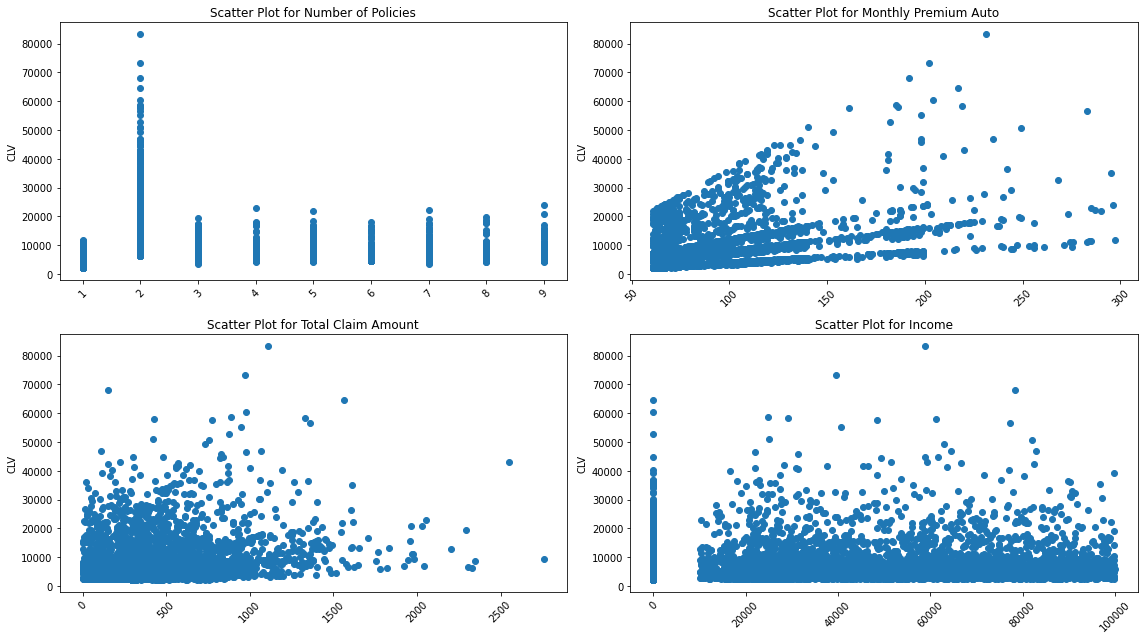

In [22]:
fig, axes = plt.subplots(2,2, figsize=(16,9))

axes = axes.ravel()

for i, col in enumerate(numerical_columns[:-1]):
    axes[i].scatter(df[col], df['Customer Lifetime Value'])
    axes[i].set_title(f"Scatter Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("CLV")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Dari scatter plot ini, tampaknya untuk fitur 'Number of Policies' tidak serta merta sesuai dengan asumsi di awal, yang mana bahwa semakin tinggi nilai untuk fitur tsb maka semakin tinggi pula nilai CLV nya. Oleh karena itu, untuk fitur ini kita akan memperlakukan sebagai kategori kategorikal, ketimbang dengan ordinal. Kemudian untuk fitur 'Monthly Premium Auto', terdapat pola yang lebih menyebar dan menunjukkan hubungan linier positif (semakin besar fitur ini, semakin besar CLV). Ini adalah salah satu fitur yang tampaknya relevan untuk CLV karena menunjukkan tren yang cukup jelas dan didukung dengan korelasi yang medium positif. Sedangkan dua sisanya masih belum memiliki hubungan yang jelas dengan CLV.

Selanjutnya, kita akan mencoba melakuan analisis lebih lanjut untuk data kategorikal/ordinal

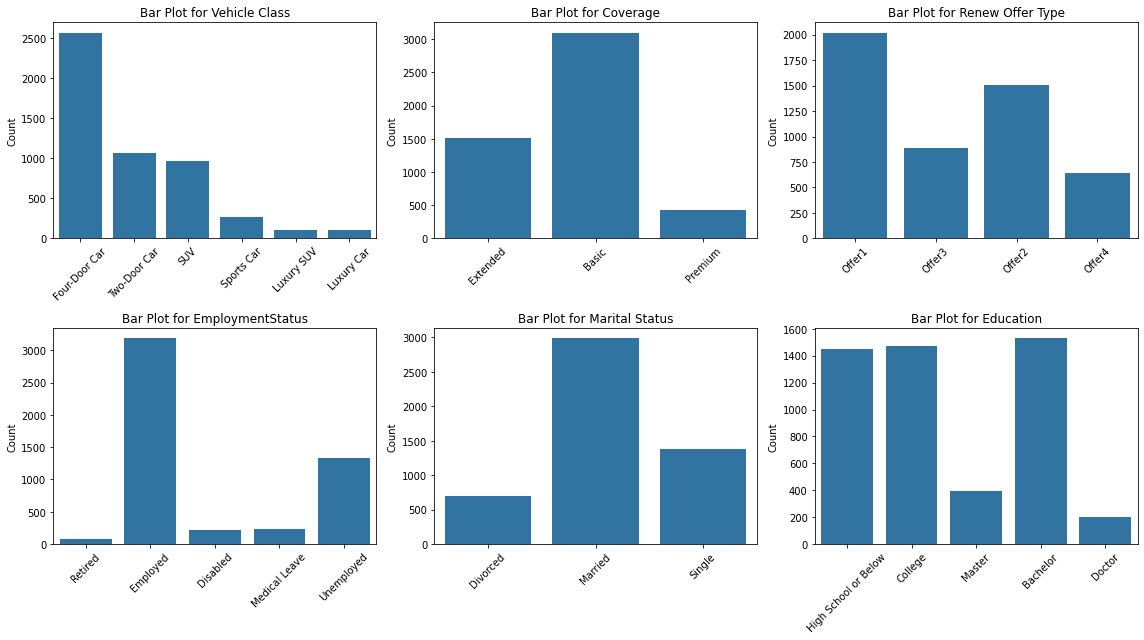

In [23]:
categorical_columns = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']

fig, axes = plt.subplots(2,3, figsize=(16,9))

axes = axes.ravel()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Bar Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
def kruskal_wallis(categorical, target, alpha=0.05):
    _, p_value = stats.kruskal(*[df[df[categorical]==category][target] for category in df[categorical].unique()])
    status = (f"There is a signifficant difference between {categorical} groups") if p_value<alpha else \
        (f"There is no signifficant difference between {categorical} groups")
    return p_value, status

In [25]:
for i in categorical_columns:
    result = kruskal_wallis(i,'Customer Lifetime Value')
    print(f"For {i} column:")
    print(f"p_value : {result[0]}")
    print(f"{result[1]}")
    print()

For Vehicle Class column:
p_value : 6.845692009848847e-167
There is a signifficant difference between Vehicle Class groups

For Coverage column:
p_value : 2.8099076767503512e-68
There is a signifficant difference between Coverage groups

For Renew Offer Type column:
p_value : 6.12426178645605e-23
There is a signifficant difference between Renew Offer Type groups

For EmploymentStatus column:
p_value : 0.00028211274463910016
There is a signifficant difference between EmploymentStatus groups

For Marital Status column:
p_value : 0.09668289750106526
There is no signifficant difference between Marital Status groups

For Education column:
p_value : 0.09115273275245567
There is no signifficant difference between Education groups



Pada kolom kategorikal tsb., untuk kolom 'Marital Status' dan 'Education' tampak tidak ada perbedaan signifikan antar kategori di setiap kolomnya. Sedangkan yang lainnya tetap ada perbedaan signifikan antar kategorinya. Namun, kita akan tetap menggunakan semua kolomnya untuk prediksi awwal.

In [26]:
df['Vehicle Class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car', 'Luxury SUV',
       'Luxury Car'], dtype=object)

<Axes: xlabel='Vehicle Class', ylabel='Customer Lifetime Value'>

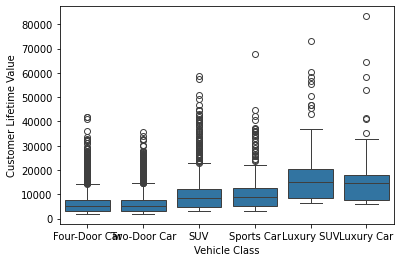

In [27]:
sns.boxplot(x='Vehicle Class', y='Customer Lifetime Value', data=df)

In [28]:
vc_list=df['Vehicle Class'].unique()
for i in vc_list:
    median = df[df['Vehicle Class']==i]['Customer Lifetime Value'].median()
    print(f"median {i} = {median}")

median Four-Door Car = 5324.38786
median Two-Door Car = 5225.03143
median SUV = 8613.464001
median Sports Car = 8774.738289
median Luxury SUV = 15167.04402
median Luxury Car = 14510.44376


In [29]:
vc_list=df['Vehicle Class'].unique()
for i in vc_list:
    mean = df[df['Vehicle Class']==i]['Customer Lifetime Value'].mean()
    print(f"mean {i} = {mean}")

mean Four-Door Car = 6617.086574901365
mean Two-Door Car = 6657.7178008725205
mean SUV = 10501.784337763238
mean Sports Car = 11543.506771862596
mean Luxury SUV = 18587.427902495052
mean Luxury Car = 16536.158479653466


In [30]:
#buat df baru
df2 = pd.DataFrame()

kategori_vc = ['Two-Door Car','Four-Door Car','SUV', 'Sports Car', 'Luxury Car', 'Luxury SUV']
df['Vehicle Class'] = pd.Categorical(df['Vehicle Class'], categories=kategori_vc, ordered=True)
df2['VC encoded'] = df['Vehicle Class'].cat.codes

In [31]:
corr, p_value = stats.spearmanr(df2['VC encoded'], df['Customer Lifetime Value'])
print(f"Spearman Correlation: {corr}, p-value: {p_value}")

Spearman Correlation: 0.336166166743998, p-value: 1.1136803213768308e-133


Berdasarkan plot distribusi fitur 'Vehicle Class' dan nilai korelasi Spearman sebesar 0.33 setelah dilakukan encoding, serta p-value < 0.05, fitur ini menunjukkan bahwa 'Vehicle Class' dapat dianggap sebagai data ordinal karena adanya hubungan monoton positif dengan target.

Hal ini juga selaras dengan real case, di mana setiap kategori Vehicle Class yang semakin tinggi nilainya atau semakin mewah, cenderung berdampak pada peningkatan nilai Customer Lifetime Value (CLV). Pelanggan dengan kelas kendaraan yang lebih tinggi biasanya memiliki potensi kontribusi yang lebih besar terhadap perusahaan, baik dari segi pembelian tambahan, loyalitas, maupun penggunaan layanan premium.

In [32]:
df['Coverage'].unique()

array(['Extended', 'Basic', 'Premium'], dtype=object)

<Axes: xlabel='Coverage', ylabel='Customer Lifetime Value'>

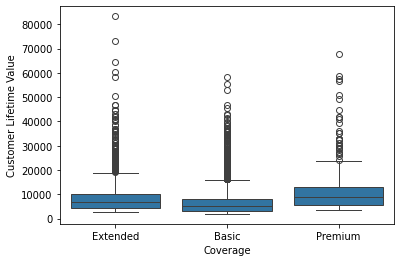

In [33]:
sns.boxplot(x='Coverage', y='Customer Lifetime Value', data=df)

In [34]:
kategori_coverage = ['Basic', 'Extended', 'Premium']
df['Coverage'] = pd.Categorical(df['Coverage'], categories=kategori_coverage, ordered=True)
df2['Coverage encoded'] = df['Coverage'].cat.codes

corr, p_value = stats.spearmanr(df2['Coverage encoded'], df['Customer Lifetime Value'])
print(f"Spearman Correlation: {corr}, p-value: {p_value}")

Spearman Correlation: 0.24494062389501953, p-value: 6.698165748720366e-70


Hal yang sama juga dilakukan untuk fitur 'Coverage'. Berdasarkan distribusi data dan nilai korelasi, fitur ini diperlakukan sebagai data ordinal, karena tipe 'Coverage' memiliki pengaruh langsung terhadap nilai Customer Lifetime Value (CLV). Secara logis, Coverage bertipe 'Premium' cenderung memiliki nilai CLV yang lebih tinggi dibandingkan tipe 'Extended' maupun 'Basic'.

In [35]:
df['Renew Offer Type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

<Axes: xlabel='Renew Offer Type', ylabel='Customer Lifetime Value'>

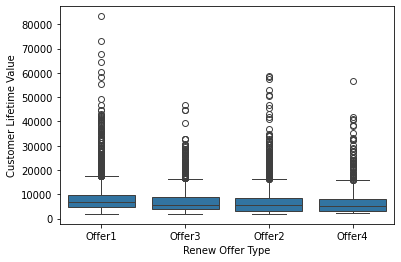

In [36]:
sns.boxplot(x='Renew Offer Type', y='Customer Lifetime Value', data=df)

In [37]:
rot_list=df['Renew Offer Type'].unique()
for i in rot_list:
    median = df[df['Renew Offer Type']==i]['Customer Lifetime Value'].median()
    print(f"median {i} = {median}")

median Offer1 = 6832.111972
median Offer3 = 5757.489397
median Offer2 = 5416.413581
median Offer4 = 5222.656199


In [38]:
kategori_rot= ['Offer4', 'Offer2', 'Offer3', 'Offer1']
df['Renew Offer Type'] = pd.Categorical(df['Renew Offer Type'], categories=kategori_rot, ordered=True)
df2['Rot encoded'] = df['Renew Offer Type'].cat.codes

corr, p_value = stats.spearmanr(df2['Rot encoded'], df['Customer Lifetime Value'])
print(f"Spearman Correlation: {corr}, p-value: {p_value}")

Spearman Correlation: 0.14361425403349162, p-value: 1.0961051139724265e-24


Untuk fitur 'Renew Offer Type', berdasarkan nilai korelasi Spearman sebesar 0.146 dan distribusi data, fitur ini akan dikategorikan sebagai data kategorikal. Hal ini dikarenakan hubungan antara 'Renew Offer Type' dan Customer Lifetime Value (CLV) cenderung lemah dan tidak menunjukkan pola urutan yang konsisten antar kategori. Selain itu, secara logis, tipe penawaran pembaruan ini lebih merepresentasikan perbedaan sifat atau jenis penawaran, tanpa hierarki tertentu yang relevan dengan nilai CLV.

Selanjutnya, fitur 'EmploymentStatus' dan 'Marital Status' akan tetap dikategorikan sebagai data kategorikal karena secara konsep tidak terdapat hierarki atau urutan logis di antara kategori-kategorinya. Sementara itu, fitur 'Education' akan dikategorikan sebagai data ordinal karena memiliki hierarki yang jelas pada setiap tingkatannya, seperti 'High School or Below' < 'College' < 'Bachelor' < 'Master' < 'Doctor'.

Selain itu, analisis juga akan dilakukan untuk memeriksa apakah pelanggan dengan Income = 0 selalu termasuk dalam tipe 'Unemployed' pada fitur 'EmploymentStatus', dan sebaliknya, untuk memastikan hubungan logis antara kedua fitur tersebut. Analisis ini penting untuk menentukan relevansi dan kemungkinan redundansi antara 'EmploymentStatus' dan Income dalam model prediksi.

In [39]:
df[df['EmploymentStatus']=='Unemployed']['Income'].unique()

array([0.])

In [40]:
df[df['Income']==0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

In [41]:
df[df['EmploymentStatus']=='Retired']['Income'].unique()

array([11828., 21514., 24910., 18608., 26806., 13528., 17622., 21073.,
       21835., 27681., 13663., 13215., 22283., 20993., 28215., 19683.,
       28321., 25147., 23376., 15648., 22567., 23665., 10621., 14290.,
       10312., 13424., 25251., 19614., 20228., 23904., 27972., 19651.,
       18577., 21959., 19581., 12902., 14973., 12201., 26802., 13624.,
       25905., 13688., 16972., 23091., 23931., 14030., 24711., 10475.,
       22828., 12454., 20983., 27504., 26714., 17557., 23909., 19782.,
       24182., 29692., 28140., 17220., 20608., 25859., 21861., 26000.,
       28142., 16794., 10337., 26121., 17752., 28120., 21004., 19186.,
       18866., 26161., 21442., 15630., 19794., 20538., 24589., 26952.,
       20862., 15520., 16224., 10787.])

In [42]:
df[df['EmploymentStatus']=='Medical Leave']['Income'].unique()

array([19030., 20325., 20567., 14665., 18643., 19861., 16686., 13164.,
       22571., 15406., 26441., 16266., 12222., 16531., 12811., 19352.,
       12048., 17780., 19064., 17130., 12780., 19121., 23053., 14306.,
       20588., 25965., 13037., 22166., 15144., 29735., 18944., 23908.,
       13154., 10237., 10334., 22338., 23554., 16154., 27132., 19066.,
       18606., 14072., 19715., 16483., 20978., 22974., 19591., 22439.,
       26463., 14382., 15462., 25370., 18505., 23638., 22520., 17161.,
       29658., 24383., 21638., 12075., 11896., 29095., 24992., 15585.,
       22842., 18129., 21238., 17576., 13610., 22070., 12607., 27229.,
       13512., 16618., 28646., 14278., 21616., 20225., 25261., 22932.,
       24046., 13908., 28513., 16244., 23051., 17101., 10563., 24641.,
       18064., 19834., 24030., 27339., 26304., 12964., 17120., 20394.,
       23748., 11489., 10194., 24584., 25550., 28700., 18120., 15752.,
       15340., 18779., 19098., 10629., 18107., 10037., 26367., 24518.,
      

In [43]:
df[df['EmploymentStatus']=='Retired']['Income'].unique()

array([11828., 21514., 24910., 18608., 26806., 13528., 17622., 21073.,
       21835., 27681., 13663., 13215., 22283., 20993., 28215., 19683.,
       28321., 25147., 23376., 15648., 22567., 23665., 10621., 14290.,
       10312., 13424., 25251., 19614., 20228., 23904., 27972., 19651.,
       18577., 21959., 19581., 12902., 14973., 12201., 26802., 13624.,
       25905., 13688., 16972., 23091., 23931., 14030., 24711., 10475.,
       22828., 12454., 20983., 27504., 26714., 17557., 23909., 19782.,
       24182., 29692., 28140., 17220., 20608., 25859., 21861., 26000.,
       28142., 16794., 10337., 26121., 17752., 28120., 21004., 19186.,
       18866., 26161., 21442., 15630., 19794., 20538., 24589., 26952.,
       20862., 15520., 16224., 10787.])

In [44]:
df[df['EmploymentStatus']=='Employed']['Income'].unique()

array([44762., 94389., 25419., ..., 27778., 84658., 60184.])

Dari hasil analisis, ditemukan bahwa jika EmploymentStatus bernilai 'Unemployed', maka Income selalu bernilai nol, dan sebaliknya. Namun, untuk kategori selain 'Unemployed', nilai Income bervariasi tergantung pada status pekerjaan, seperti Retired, Medical Leave, atau Disabled, yang memiliki pola penghasilan berbeda. Oleh karena itu, kedua fitur ini tetap akan digunakan dalam prediksi karena masing-masing menyumbangkan informasi unik yang tidak sepenuhnya terwakili satu sama lain.

### **Modeling**

In [45]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value'] 

In [46]:
group1 = ['Monthly Premium Auto', 'Income']
group2 = ['Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Number of Policies']
group3 = ['Vehicle Class', 'Coverage', 'Education']

vehicle_order = ['Two-Door Car','Four-Door Car','SUV', 'Sports Car', 'Luxury Car', 'Luxury SUV']
coverage_order = ['Basic', 'Extended', 'Premium']
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

transformer1 = Pipeline(steps=[
    ('robust', RobustScaler()),
    ('minmax', MinMaxScaler())
])

transformer2 = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

transformer3 = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[vehicle_order, coverage_order,education_order])),
    ('minmax', MinMaxScaler())
])

transformer4 = Pipeline(steps=[
    ('log_transform', FunctionTransformer(func=np.cbrt)),
    ('robust', RobustScaler()),
    ('minmax', MinMaxScaler())
])
Transform = ColumnTransformer([
    ('g1', transformer1, group1),
    ('g2', transformer2, group2),
    ('g3', transformer3, group3),
    ('g4', transformer4, ['Total Claim Amount'])
], remainder = 'passthrough')

In [47]:
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
ranfor = RandomForestRegressor()
svm = SVR()
knn = KNeighborsRegressor()
xgbr = xgb.XGBRFRegressor()
lgbr = lgb.LGBMRegressor(verbosity=-1)

In [48]:
models = [linreg, ridge, lasso, ranfor, svm, knn, xgbr, lgbr]
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
mean = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for index, model in enumerate(models):
    pipeline = Pipeline(steps=[
        ('transformer', Transform),
        ('model', model)
    ])
    
    metric_mean = []
    for metric in metrics:
        model_cv = cross_val_score(pipeline, X, y, cv=kf, scoring=metric)
        result  = round(model_cv.mean(),2)
        if metric == 'r2':
            metric_mean.append(result)
        elif metric == 'neg_mean_squared_error':
            result2 = round(np.sqrt(-result),2)
            metric_mean.append(-result)
            metric_mean.append(result2)
        else:
            metric_mean.append(-result)

    mean[index] = metric_mean


In [49]:
metric_name = ['R^2','MSE','RMSE','MAE','MAPE']
model_name = ['Linear Regression', 'Ridge','Lasso','Random Forest','SVM','KNN','XGB','LGBM']
metric_table = pd.DataFrame(mean).T
metric_table.columns=metric_name
metric_table.insert(0,'Model', model_name)
metric_table

,Model,R^2,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.64,17717529.98,4209.22,2121.70,0.25
1,Ridge,0.64,17722254.04,4209.78,2114.34,0.25
2,Lasso,0.64,17715947.63,4209.03,2116.76,0.25
3,Random Forest,0.65,17053442.16,4129.58,1685.09,0.12
4,SVM,-0.08,52574528.82,7250.83,4026.99,0.49
5,KNN,0.54,22440525.73,4737.14,2359.89,0.22
6,XGB,0.68,15639005.38,3954.62,1704.71,0.13
7,LGBM,0.66,16585393.63,4072.52,1766.62,0.14


Pada tahap ini, kita memilih satu model yang akan digunakan untuk prediksi selanjutnya. XGBoost dipilih karena memiliki kinerja yang sangat unggul di semua metrik utama dibandingkan model lainnya. Dengan R² sebesar 0.68, XGBoost dapat menjelaskan sebagian besar variansi dalam data, yang menunjukkan kemampuannya dalam menghasilkan prediksi yang akurat. Selain itu, MSE, RMSE, MAE, dan MAPE yang lebih rendah dibandingkan model lain menunjukkan bahwa XGBoost menghasilkan kesalahan prediksi yang lebih kecil dan lebih stabil. Keunggulan ini berasal dari kemampuan boosting yang secara iteratif mengoptimalkan model, memungkinkan XGBoost untuk menangani hubungan non-linear yang kompleks dengan lebih efektif. Oleh karena itu, XGBoost adalah model yang paling tepat untuk dianalisis lebih lanjut guna mendapatkan performa terbaik.

Selanjutnya, kita mencoba untuk melihat feature importance dari model awal kita dengan menggunakan XGB Regressor dan mencoba untuk menganalisis lebih lanjut untuk setiap fiturnya.

In [50]:
X_transformed = Transform.fit_transform(X)

feature_names_manual = (
    group1 +
    list(Transform.named_transformers_['g2'].get_feature_names_out(group2)) +
    ['Vehicle Class', 'Coverage', 'Education'] +
    ['log_Total_Claim_Amount']
)

X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names_manual)

X_transformed_df.head()

,Monthly Premium Auto,Income,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Number of Policies_4.0,Number of Policies_5.0,Number of Policies_6.0,Number of Policies_7.0,Number of Policies_8.0,Number of Policies_9.0,Vehicle Class,Coverage,Education,log_Total_Claim_Amount
0,0.122881,0.118358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.00,0.568521
1,0.004237,0.447916,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.2,0.0,0.25,0.309224
2,0.004237,0.215282,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.422498
3,0.233051,0.179248,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.00,0.563122
4,0.004237,0.190426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.477201


In [51]:
xgbr.fit(X_transformed_df, y)

# Ambil feature importance
importance = xgbr.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names_manual,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
15,Number of Policies_2.0,0.739967
14,Number of Policies_1.0,0.142541
23,Vehicle Class,0.036747
0,Monthly Premium Auto,0.015296
16,Number of Policies_3.0,0.011172
12,Marital Status_Married,0.008382
26,log_Total_Claim_Amount,0.006510
3,Renew Offer Type_Offer2,0.005672
25,Education,0.005368
5,Renew Offer Type_Offer4,0.004794


Dari 'Feature importance' ini, salah satu fitur yang paling berpengaruh adalah fitur 'Number of Policies'. Selanjutnya, kita akan mencoba untuk menganalisis fitur ini lebih lanjut untuk melihat patternya.

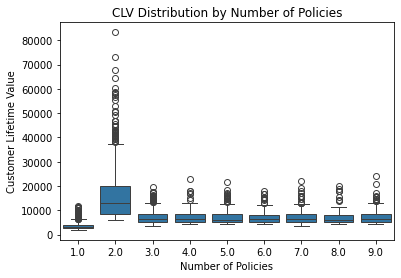

In [52]:
sns.boxplot(x='Number of Policies', y='Customer Lifetime Value', data=df)
plt.title("CLV Distribution by Number of Policies")
plt.show()

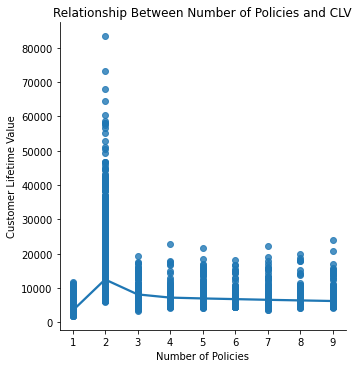

In [53]:
sns.lmplot(x='Number of Policies', y='Customer Lifetime Value', data=df, lowess=True)
plt.title("Relationship Between Number of Policies and CLV")
plt.show()

In [54]:
#Mean
df.groupby('Number of Policies')['Customer Lifetime Value'].mean().reset_index()

,Number of Policies,Customer Lifetime Value
0,1.0,3536.382844
1,2.0,15848.416574
2,3.0,7113.751720
3,4.0,7179.090222
4,5.0,7275.069902
5,6.0,7069.262143
6,7.0,7216.528482
7,8.0,7101.304723
8,9.0,7164.242784


In [55]:
#Median
df.groupby('Number of Policies')['Customer Lifetime Value'].median().reset_index()

,Number of Policies,Customer Lifetime Value
0,1.0,3059.182181
1,2.0,12986.902435
2,3.0,6347.497519
3,4.0,6333.030812
4,5.0,6063.392804
5,6.0,6282.750917
6,7.0,6418.248710
7,8.0,6042.911900
8,9.0,6225.781965


Berdasarkan informasi sebelumnya, bahwa korelasi fitur 'Number of Policies' dengan target CLV adalah 0.49. Lalu, dari pattern distribusi untuk setiap kategori pada fiturnya dan dari median serta mean masing masing kategori, kita dapat mencoba untuk mengelompokkan menjadi 3 kategori.

Kategori 1 saat nilai Number of Policies = 2

Kategori 2 saat nilai Number of Policies selain 1 dan 2 

Kategori 3 saat nilai Number of Policies = 1

Kemudian, dari kategori tsb. kita dapat membuatnya menjadi fitur dengan tipe data ordinal.

In [56]:
#Fungsi transform Number of Policies
def transform_number_of_policies(df_):
    df_ = df_.copy()
    df_['Number of Policies'] = df_['Number of Policies'].replace({
        1. : 1.,
        2. : 3.,
        3. : 2.,
        4. : 2.,
        5. : 2.,
        6. : 2.,
        7. : 2.,
        8. : 2.,
        9. : 2.
    })
    return df_

In [57]:
test_nop=transform_number_of_policies(df)
test_nop['Number of Policies'].unique()

array([3., 2., 1.])

Selanjutnya, untuk fitur lainnya tetap dan tidak diubah, sesuai dengan hasil analisis pada model prediksi awal, karena perubahan terhadap fitur-fitur tersebut tidak meningkatkan performa model secara signifikan (*berdasarkan hasil uji coba trial and error yang telah dilakukan). Namun, untuk lebih meningkatkan kualitas hasil prediksi sebelum melakukan hyperparameter tuning pada model XGB Regressor, diperlukan langkah tambahan yang dapat memperbaiki performa model secara efektif. Salah satu teknik yang dapat dilakukan adalah winsorizing, yang meskipun efektif, tetap memerlukan kehati-hatian dalam interpretasi hasilnya.

Teknik winsorizing dipilih karena data target ('Customer Lifetime Value') memiliki distribusi yang sangat skewed (ekstrim ke kanan). Ketidakseimbangan distribusi ini dapat menyebabkan model lebih sulit untuk menangkap pola dengan baik, terutama untuk nilai-nilai ekstrem yang jarang. Dengan melakukan winsorizing ke atas, nilai di atas quantile tertentu (misalnya, quantile ke-98) disesuaikan menjadi setara dengan nilai pada quantile tersebut. Pendekatan ini membantu menjaga distribusi data tetap utuh tanpa menghilangkan terlalu banyak informasi, sekaligus mengurangi pengaruh nilai-nilai ekstrem terhadap model.

Dalam hal ini, dipilih nilai pada quantile ke-98 untuk memastikan bahwa sebagian besar informasi tetap dipertahankan sambil meminimalkan efek dari outliers. Langkah ini juga sejalan dengan prinsip robust modeling, yaitu memastikan model dapat menangkap pola utama tanpa terganggu oleh data yang tidak representatif atau terlalu ekstrem. Dengan demikian, hasil prediksi yang dihasilkan diharapkan menjadi lebih stabil dan akurat pada saat hyperparameter tuning dilakukan.

In [58]:
upper_limit_clv =  df['Customer Lifetime Value'].quantile(0.98)
df['CLV Winsorized'] = df['Customer Lifetime Value'].clip(upper=upper_limit_clv)
df['CLV Winsorized'].max()

29874.74493

In [59]:
#mengganti nilai y ke CLV winsorized
y_new = df['CLV Winsorized']

In [60]:
#New Pipeline
transformer1 = Pipeline(steps=[
    ('robust', RobustScaler()),
    ('minmax', MinMaxScaler())
])

transformer2 = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

transformer3 = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[vehicle_order, coverage_order,education_order])),
    ('minmax', MinMaxScaler())
])

transformer4 = Pipeline(steps=[
    ('log_transform', FunctionTransformer(func=np.cbrt,feature_names_out='one-to-one')),
    ('robust', RobustScaler()),
    ('minmax', MinMaxScaler())
])

transformer5 = Pipeline(steps=[
    ('group_numberofpolices', FunctionTransformer(transform_number_of_policies)),
    ('minmax', MinMaxScaler())
])

Transform_new = ColumnTransformer([
    ('g1', transformer1, group1),
    ('g2', transformer2, group2[:-1]),
    ('g3', transformer3, group3),
    ('g4', transformer4, ['Total Claim Amount']),
    ('g5', transformer5, ['Number of Policies'])
], remainder = 'passthrough')

In [61]:
pipeline_new = Pipeline(steps=[
    ('transformer', Transform_new),
    ('model', xgbr)
])

In [62]:
X_transformed = Transform_new.fit_transform(X)

feature_names_manual = (
    group1 +
    list(Transform_new.named_transformers_['g2'].get_feature_names_out(group2[:-1])) +
    ['Vehicle Class', 'Coverage', 'Education'] +
    ['log_Total_Claim_Amount']+['Number of Policies']
)

X_transformed_df_new = pd.DataFrame(X_transformed, columns=feature_names_manual)

X_transformed_df_new.head()

,Monthly Premium Auto,Income,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Vehicle Class,Coverage,Education,log_Total_Claim_Amount,Number of Policies
0,0.122881,0.118358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.2,0.5,0.00,0.568521,1.0
1,0.004237,0.447916,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.0,0.25,0.309224,0.5
2,0.004237,0.215282,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75,0.422498,1.0
3,0.233051,0.179248,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,1.0,0.00,0.563122,0.0
4,0.004237,0.190426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.477201,0.0


**Hyperparameter Tuning**

Pada tahap ini, kita akan menggunakan Optuna untuk melakukan tuning hyperparameter pada model XGB Regressor. Hyperparameter yang akan dioptimalkan mencakup n_estimators, max_depth, learning_rate, dan parameter lainnya yang relevan. Proses ini bertujuan untuk menemukan kombinasi hyperparameter yang menghasilkan performa terbaik. Hasil optimal yang diperoleh nantinya akan digunakan dalam pipeline model untuk prediksi akhir.

In [63]:
def objective(trial):
    # Set hyperparameter yang akan dioptimalkan
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0)
    }
    
    xgbr = xgb.XGBRegressor(**params, random_state=42)
    pipeline_new = Pipeline(steps=[
        ('transformer', Transform_new),
        ('model', xgbr)
    ])

    score = cross_val_score(pipeline_new, X, y_new, cv=5, scoring='neg_mean_absolute_error')

    return score.mean()

# Nonaktifkan log detail Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Done")

Done


In [64]:
best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params, random_state=42)

# Final Pipeline
final_pipeline = Pipeline(steps=[
    ('transformer', Transform_new),
    ('model', final_model)
])

**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan Feature Engineering (Number of Policies dan Target) serta hyperparameter tuning.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,y_new,test_size=0.2, random_state=42)

In [66]:
def eval_metric(y_test,y_pred):
    r2 = round(r2_score(y_test, y_pred),2)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    mse = round(mean_squared_error(y_test, y_pred),2)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)
    mape = round((abs((y_test - y_pred) / y_test).mean()),2)

    metrics_df = pd.DataFrame({
        "Model" : ["XGB"],
        "R2" : [r2],
        "MSE" : [mse],
        "RMSE" : [rmse],
        "MAE" : [mae],
        "MAPE" : [mape]
    })

    return metrics_df


In [67]:
#Before tunning and feature eng.
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

#After tunning and feature eng.
final_pipeline.fit(X_train_new, y_train_new)
y_pred_new = final_pipeline.predict(X_test_new)

In [68]:
prediction_result = pd.DataFrame({
    "y_test" : y_test_new,
    "y_pred" : y_pred_new
})

**Result before tunning and feature engineering**

In [69]:
eval_metric(y_test,y_pred)

,Model,R2,MSE,RMSE,MAE,MAPE
0,XGB,0.68,15138179.76,3890.78,1643.22,0.14


**Result after tunning and feature engineering**

In [70]:
eval_metric(y_test_new,y_pred_new)

,Model,R2,MSE,RMSE,MAE,MAPE
0,XGB,0.73,8902033.87,2983.63,1336.34,0.12


Model mengalami peningkatan performa (nilai MSE, RMSE, MAE & MAPE berkurang sedangkan nilai R2 meningkat) dengan dilakukannya hyperparameter tuning dan feature engineering.

**Feature Importance**

In [71]:
final_model.fit(X_transformed_df_new, y)

# Ambil feature importance
importance = final_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names_manual,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
18,Number of Policies,0.742198
0,Monthly Premium Auto,0.049773
14,Vehicle Class,0.048004
15,Coverage,0.016682
3,Renew Offer Type_Offer2,0.014948
17,log_Total_Claim_Amount,0.013833
5,Renew Offer Type_Offer4,0.013625
12,Marital Status_Married,0.012049
11,Marital Status_Divorced,0.011557
1,Income,0.011515


**Save Model**

In [72]:
final_pipeline.fit(X, y_new)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('g1',
                                                  Pipeline(steps=[('robust',
                                                                   RobustScaler()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Monthly Premium Auto',
                                                   'Income']),
                                                 ('g2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Renew Offer Type',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('g3',
                                                  Pipeline(steps=[('o...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.07512480451393796, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=87, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [73]:
result_for_save = {
    'pipeline' : final_pipeline,
    'metrics' : eval_metric(y_test_new,y_pred_new),
    'prediction' : prediction_result,
    'feature_importance' :feature_importance_df
}

In [74]:
with open('model.pkl', 'wb') as f:
    cloudpickle.dump(result_for_save, f)

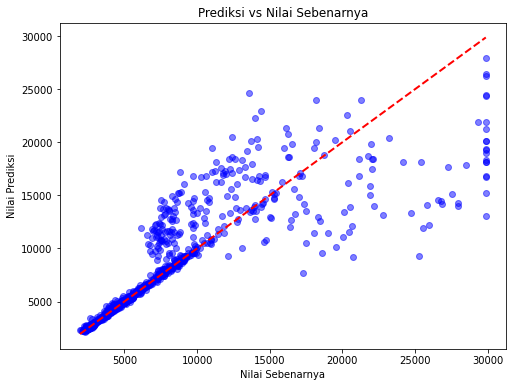

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_new, y_pred_new, color='blue', alpha=0.5)
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], 'r--', lw=2)  # Garis y = x
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.show()


### **Conclussion**

Berdasarkan pemodelan yang telah dilakukan, fitur 'Number of Policies' dan 'Vehicle Class' terbukti memiliki pengaruh yang signifikan terhadap prediksi Customer Lifetime Value (CLV).

Metrik evaluasi yang digunakan pada model ini mencakup nilai R², MSE, RMSE, MAE, dan MAPE. Dari hasil evaluasi, model menunjukkan nilai MAPE sekitar 12%, yang menunjukkan bahwa rata-rata prediksi harga CLV dapat meleset sekitar 12% dari nilai yang seharusnya.

Namun, meskipun model menunjukkan performa yang baik, prediksi CLV masih memiliki kecenderungan bias yang cukup tinggi terutama pada nilai CLV yang di atas 20 ribu, yang tercermin dari perbedaan antara harga aktual dan harga prediksi. Bias ini bisa disebabkan oleh keterbatasan fitur dalam dataset yang tidak sepenuhnya mewakili berbagai aspek penting yang dapat memengaruhi CLV, seperti kurangnya data latih untuk nilai CLV yang tinggi.

Untuk mengatasi masalah bias ini, dilakukan winsorizing pada target CLV di kuantil ke-98. Tujuan dari winsorizing ini adalah untuk mengurangi pengaruh nilai-nilai ekstrem (outliers) yang dapat mendistorsi model, yang pada awalnya menunjukkan CLV dengan nilai hingga 80 ribuan, menjadi lebih terkontrol pada sekitar 30 ribuan. Dengan cara ini, model menjadi lebih fokus pada distribusi data yang lebih umum dan mengurangi ketergantungan pada data ekstrim yang tidak realistis.

Winsorizing juga membuka peluang untuk memberikan label VIP kepada customer dengan CLV di atas 25 ribuan, karena pada nilai tersebut, kemungkinan besar customer tersebut memiliki potensi lifetime value yang lebih tinggi daripada rata-rata, meskipun nilai prediksi model mungkin sedikit meleset. Memberikan label VIP pada customer dengan CLV tinggi memungkinkan stakeholder untuk mengidentifikasi customer dengan potensi tinggi lebih awal dan memberikan perhatian khusus untuk meningkatkan retensi atau profitabilitas.

Model ini masih memiliki ruang untuk perbaikan lebih lanjut. Salah satu cara untuk meningkatkan akurasi dan efektivitas model adalah dengan menambah data terbaru yang relevan, terutama yang dapat mencerminkan dinamika pasar atau perilaku customer yang lebih terkini dan customer yang meiliki nilai CLV yang lebih tinggi. 

Dari perbaikan ini, kita dapat memperoleh insight lebih lanjut mengenai fitur-fitur yang lebih berpengaruh terhadap CLV dan bagaimana cara model bisa lebih baik dalam mengidentifikasi customer dengan potensi tinggi. Dengan pendekatan-pendekatan tersebut, diharapkan model dapat memberikan hasil yang lebih optimal dan lebih akurat dalam jangka panjang.




Model ini masih memiliki ruang untuk perbaikan lebih lanjut. A/B testing pada model yang telah dibangun dapat dilakukan untuk mengevaluasi efektivitasnya dalam meningkatkan hasil prediksi atau retensi customer. Dari hasil A/B testing, kita dapat memperoleh insight lebih lanjut mengenai aspek-aspek yang perlu diperbaiki dalam model ini untuk hasil yang lebih optimal.

### **Recommendations**

1. Identifikasi Customer VIP Berdasarkan CLV
Dengan memanfaatkan model CLV yang telah dibangun, bisnis dapat mengidentifikasi customer dengan potensi tinggi (VIP) berdasarkan prediksi CLV. Customer dengan CLV di atas angka tertentu (misalnya 25 ribu) bisa diberikan perlakuan khusus, seperti penawaran eksklusif atau program loyalitas yang meningkatkan retensi dan lifetime value mereka. Ini dapat membantu meningkatkan hubungan jangka panjang dan memastikan bahwa bisnis tidak kehilangan peluang dari customer potensial yang memiliki nilai tinggi.

2. Segmentasi Customer untuk Strategi Pemasaran
Model ini dapat digunakan untuk melakukan segmentasi customer secara lebih akurat berdasarkan prediksi CLV. Dengan segmentasi ini, tim pemasaran bisa menyusun kampanye yang lebih terarah dan efektif, seperti penargetan iklan atau penawaran spesial untuk customer dengan CLV tinggi atau customer dengan CLV rendah yang berpotensi untuk meningkatkan nilai mereka. Pemasaran yang lebih terfokus ini akan mengurangi pemborosan anggaran dan meningkatkan konversi.

3. Optimasi Penetapan Harga Berdasarkan CLV
Model CLV juga bisa digunakan untuk menentukan strategi penetapan harga yang lebih dinamis. Misalnya, customer dengan CLV yang tinggi bisa diberi harga khusus atau diskon, sedangkan customer dengan CLV rendah dapat dikenakan harga penuh atau diberikan tawaran untuk mendorong mereka bertransaksi lebih sering. Dengan cara ini, model CLV membantu bisnis dalam mengatur harga secara lebih strategis berdasarkan potensi jangka panjang customer.

4. Penggunaan Model untuk A/B Testing Strategi Bisnis
Meskipun A/B testing lebih umum digunakan untuk uji coba elemen-elemen pemasaran, di sini bisnis bisa menguji efektivitas strategi CLV seperti personalisasi harga, penawaran eksklusif, atau kampanye pemasaran berdasarkan CLV customer. Ini dapat memberikan insight apakah strategi yang diterapkan benar-benar meningkatkan retensi customer dan profitabilitas jangka panjang.

5. Personalisasi Pengalaman Customer
Model CLV memungkinkan perusahaan untuk menyesuaikan pengalaman customer dengan lebih tepat. Dengan mengetahui potensi nilai setiap customer, bisnis dapat menawarkan penawaran khusus atau layanan prioritas yang lebih sesuai dengan preferensi dan kebutuhan customer. Personalisasi ini akan meningkatkan loyalitas customer dan membuat mereka merasa dihargai, sehingga mendorong interaksi lebih lanjut dan meningkatkan nilai lifetime mereka.